**LISTA PRÁTICA DAS UNIDADES 1 E 2**

Pode ser feita com o grupo do projeto. Recomendo pair/group programming para que todos vejam um pouco de todas as partes.


Treine e avalie 4 modelos de classificação para a base de dados de "handwritten digits" do MNIST https://en.wikipedia.org/wiki/MNIST_database.



1.   Um modelo base que não seja uma rede neural, como _decision tree, xgboost, random forest_, etc. Recomendação: use o sklearn (https://scikit-learn.org/).

2.   Uma MLP

3. Uma rede convolucional criada por ti. Recomendação: https://pytorch.org/

4. Use um modelo pre treinado já consolidado na literatura para fazer _transfer learning_. Recomendações: https://pytorch.org/hub/pytorch_vision_vgg/


Compare os resultados dos modelos:
* plote gráficos que mostrem as acurácias de cada modelo
* indique para cada modelo qual foi o digito mais dificil de classificar (indique qual métrica usou para concluir isso)
* argumente qual o melhor modelo levando em consideração o tempo de execução e acurácia.

Recomendação use:
https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html .



# Imports e Downloads

In [1]:
from mlxtend.data import loadlocal_mnist
import numpy as np

In [2]:
X_train_path = 'train-images.idx3-ubyte'
y_train_path = 'train-labels.idx1-ubyte'
X_test_path = 't10k-images.idx3-ubyte'
y_test_path = 't10k-labels.idx1-ubyte'

In [3]:
X_train, y_train = loadlocal_mnist( X_train_path, y_train_path)
X_test, y_test = loadlocal_mnist(X_test_path, y_test_path)

In [4]:
print('Shape dos dados de treino:', np.shape(X_train))
print('Quantidade de labels de treino:',np.shape(y_train),'\n')
print('Shape dos dados de teste:', np.shape(X_test))
print('Quantidade de labels de teste:',np.shape(y_test))

Shape dos dados de treino: (60000, 784)
Quantidade de labels de treino: (60000,) 

Shape dos dados de teste: (10000, 784)
Quantidade de labels de teste: (10000,)


# Modelo base

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

In [ ]:
start_time = time.time()
decision_tree_model.fit(X_train, y_train)
training_time = time.time() - start_time

In [ ]:
start_time = time.time()
y_pred = decision_tree_model.predict(X_test)
inference_time = time.time() - start_time

In [ ]:
print("Tempo de treinamento:", training_time, "segundos")
print("Tempo de inferência:", inference_time, "segundos")

Tempo de treinamento: 23.527249574661255 segundos
Tempo de inferência: 0.02279353141784668 segundos


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia da árvore de decisão: {accuracy*100}%")

Acurácia da árvore de decisão: 87.55%


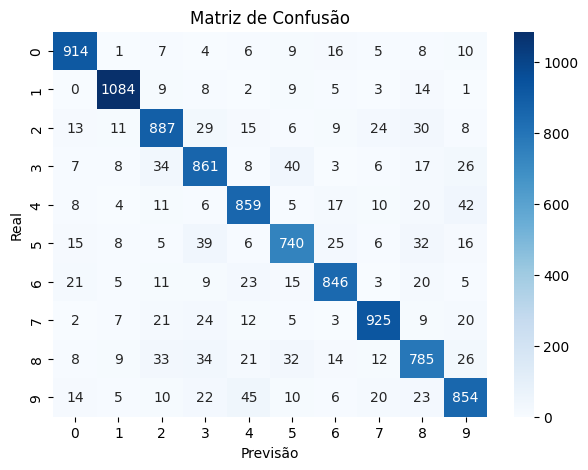

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
most_difficult_digit = np.argmin(np.diagonal(conf_matrix))
print("Dígito mais difícil de ser classificado:", most_difficult_digit)

Dígito mais difícil de ser classificado: 5


# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLP_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=10)

In [ ]:
print("Número de camadas ocultas:", len(MLP_model.hidden_layer_sizes))
print("Número de neurônios em cada camada oculta:", MLP_model.hidden_layer_sizes)
print("Função de ativação:", MLP_model.activation)
print("Otimizador:", MLP_model.solver)

Número de camadas ocultas: 2
Número de neurônios em cada camada oculta: (128, 64)
Função de ativação: relu
Otimizador: adam


In [ ]:
start_time = time.time()
MLP_model.fit(X_train, y_train)
training_time = time.time() - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
start_time = time.time()
y_pred = MLP_model.predict(X_test)
inference_time = time.time() - start_time

In [ ]:
print("Tempo de treinamento:", training_time, "segundos")
print("Tempo de inferência:", inference_time, "segundos")

Tempo de treinamento: 30.25943875312805 segundos
Tempo de inferência: 0.16029095649719238 segundos


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia da MLP: {accuracy*100}%")

Acurácia da MLP: 95.14%


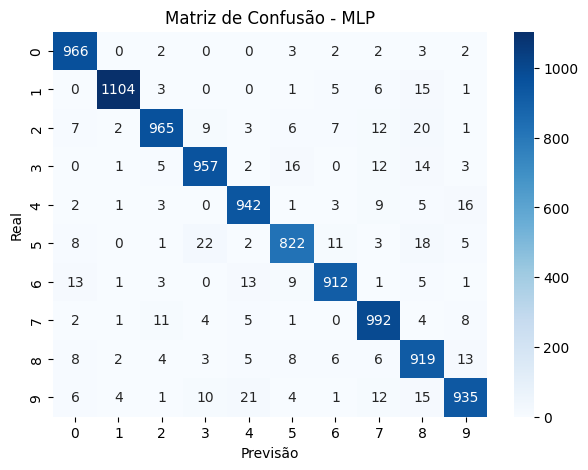

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - MLP')
plt.show()

In [ ]:
most_difficult_digit = np.argmin(np.diagonal(conf_matrix))
print("Dígito mais difícil de ser classificado:", most_difficult_digit)

Dígito mais difícil de ser classificado: 5


# Rede Convolucional

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [40]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [41]:
CNN_model = CNN()

In [42]:
print(CNN_model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=-1)
)


In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(CNN_model.parameters(), lr=0.001)

In [28]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
X_train_reshaped = X_train_tensor.reshape(-1, 1, 28, 28)
X_test_reshaped = X_test_tensor.reshape(10000, 1, 28, 28)
y_train_reshaped = y_train_tensor.reshape(60000,1)
y_test_reshaped = y_test_tensor.reshape(10000,1)

In [29]:
dataset_train = TensorDataset(X_train_tensor, y_train_tensor)

In [30]:
train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True)

In [43]:
start_time = time.time()
for epoch in range(10):
  for batch_X, batch_y in train_loader:
    optimizer.zero_grad()
    batch_X_reshaped = batch_X.view(batch_X.size(0), 1, 28, 28)
    outputs = CNN_model(batch_X_reshaped)
    loss = criterion(outputs, batch_y)
    loss.backward()
    optimizer.step()
training_time = time.time() - start_time

In [44]:
start_time = time.time()
CNN_model.eval()
with torch.no_grad():
    X_test_reshaped = X_test_tensor.view(X_test_tensor.size(0), 1, 28, 28)
    pred = CNN_model(X_test_reshaped)
inference_time = time.time() - start_time

In [45]:
print("Tempo de treinamento:", training_time, "segundos")
print("Tempo de inferência:", inference_time, "segundos")

Tempo de treinamento: 700.1385605335236 segundos
Tempo de inferência: 9.536565065383911 segundos


In [61]:
pred_class = torch.tensor([int(np.argmax(pred[i])) for i in range(pred.shape[0])])

In [67]:
accuracy = accuracy_score(y_test_tensor, pred_class)
print(f"Acurácia da CNN: {accuracy*100}%")

Acurácia da CNN: 9.76%


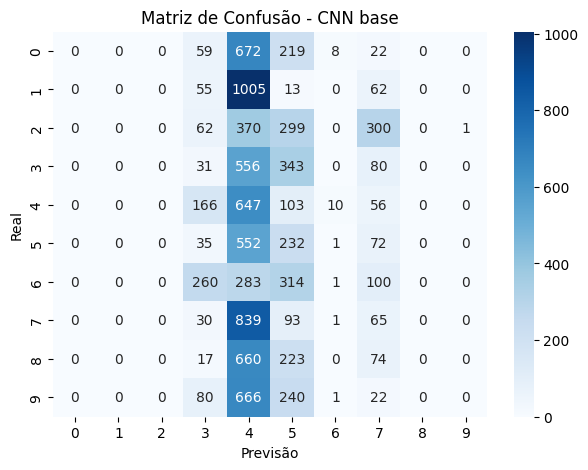

In [69]:
conf_matrix = confusion_matrix(y_test_tensor, pred_class)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - CNN base')
plt.show()

In [70]:
most_difficult_digit = np.argmin(np.diagonal(conf_matrix))
print("Dígito mais difícil de ser classificado:", most_difficult_digit)

Dígito mais difícil de ser classificado: 0


# Rede Convolucional consolidada

In [72]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 16 * 4 * 4)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [73]:
lenet_model = LeNet()

In [74]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lenet_model.parameters(), lr=0.001)

In [75]:
start_time = time.time()
for epoch in range(10):
  for batch_X, batch_y in train_loader:
    optimizer.zero_grad()
    batch_X_reshaped = batch_X.view(batch_X.size(0), 1, 28, 28)
    outputs = lenet_model(batch_X_reshaped)
    loss = criterion(outputs, batch_y)
    loss.backward()
    optimizer.step()
training_time = time.time() - start_time

In [76]:
start_time = time.time()
lenet_model.eval()
with torch.no_grad():
    X_test_reshaped = X_test_tensor.view(X_test_tensor.size(0), 1, 28, 28)
    pred = lenet_model(X_test_reshaped)
inference_time = time.time() - start_time

In [77]:
print("Tempo de treinamento:", training_time, "segundos")
print("Tempo de inferência:", inference_time, "segundos")

Tempo de treinamento: 180.39088654518127 segundos
Tempo de inferência: 1.2988569736480713 segundos


In [79]:
pred_class = torch.tensor([int(np.argmax(pred[i])) for i in range(pred.shape[0])])

In [81]:
accuracy = accuracy_score(y_test_tensor, pred_class)
print(f"Acurácia da LeNet: {accuracy*100}%")

Acurácia da LeNet: 98.83%


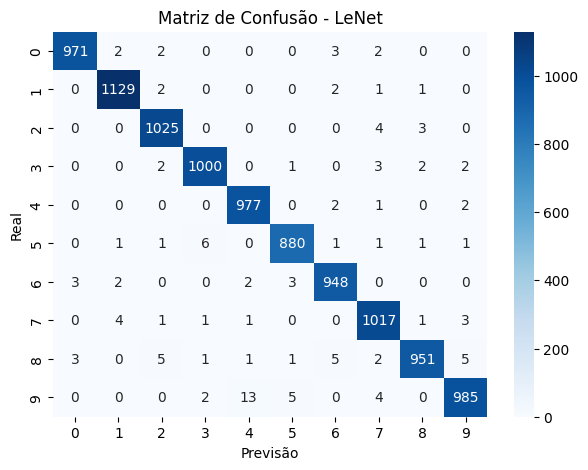

In [83]:
conf_matrix = confusion_matrix(y_test_tensor, pred_class)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - LeNet')
plt.show()

In [84]:
most_difficult_digit = np.argmin(np.diagonal(conf_matrix))
print("Dígito mais difícil de ser classificado:", most_difficult_digit)

Dígito mais difícil de ser classificado: 5


# Comparação

Pelas análises das redes implementadas acima, podemos concluir que:

Quanto à rede com maior acurácia, em ordem decrescente, temos:

1.   LeNet
2.   MLP
3.   Árvore de decisão
4.  CNN básica

Com relação ao tempo de treinamento e inferência, temos que as mais rápidas foram:

1. Árvore de decisão
2. MLP
3. LeNet
4. CNN básica

Já o dígito mais difícil de ser encontrado foi o número 5 em três das redes implementadas (Árvore de decisão, MLP e LeNet), enquanto que na CNN básica foram os números zero, um, dois, oito e nove (segundo a matriz de confusão).